In [1341]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import files

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# uploaded = files.upload() #- try this once

import os
from google.colab import drive
drive.mount('/content/drive')

#uploaded = files.upload()

print('Hello world!')
for dirname, _, filenames in os.walk('drive/My Drive/Colab Notebooks/kaggle_input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hello world!
drive/My Drive/Colab Notebooks/kaggle_input/test.csv
drive/My Drive/Colab Notebooks/kaggle_input/sample_submission.csv
drive/My Drive/Colab Notebooks/kaggle_input/train.csv


In [1342]:

import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer #normalize word form
from nltk.probability import FreqDist #frequency word count
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords #stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist 
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import string
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
train_t= pd.read_csv('drive/My Drive/Colab Notebooks/kaggle_input/train.csv')
test_t=pd.read_csv('drive/My Drive/Colab Notebooks/kaggle_input/test.csv')

In [1344]:
train_t.info()
train_t.shape
train_t.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [1345]:
test_t.info()
test_t.shape
test_t.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


### At this time, Kaggle data is imported.

### Data Pre-processing

### Reference: https://github.com/sumi2017/AML_Project/blob/master/PreProcess/Xumin_preprocess/preprocess.ipynb


In [0]:

train_t.keyword = train_t.keyword.fillna("unknown")
train_t.location = train_t.location.fillna("unknown")

In [0]:

train_t.keyword = train_t.keyword.apply(lambda x: x.lower())

In [0]:
train_t.keyword = train_t.keyword.apply(lambda x: x.split('%20') if "%20" in x else x )

In [0]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()
key_word = []

for i,x in enumerate(train_t.keyword.values):
    
    try:
        
        a = wnl.lemmatize(ps.stem(x))

        
    except AttributeError:
        
        a = [wnl.lemmatize(ps.stem(st)) for j,st in enumerate(x)]
    
    key_word.append(a)

In [0]:
train_t.keyword = key_word

In [0]:
train_t.keyword = train_t.keyword.apply(lambda x: ''.join(x) if type(x) is list else x)

In [1352]:
len(train_t.keyword.unique())

167

In [1353]:
train_t.keyword.value_counts()

fatal          120
evacu          112
derail         112
flood          109
bodibag        107
              ... 
bushfire        25
warzone         24
epicentr        12
threat          11
radiatemerg      9
Name: keyword, Length: 167, dtype: int64

In [0]:
idx_val = train_t.keyword.value_counts().index.values
key_counts = train_t.keyword.value_counts().values

([<matplotlib.axis.YTick at 0x7f319c666208>,
 <a list of 167 Text yticklabel objects>)

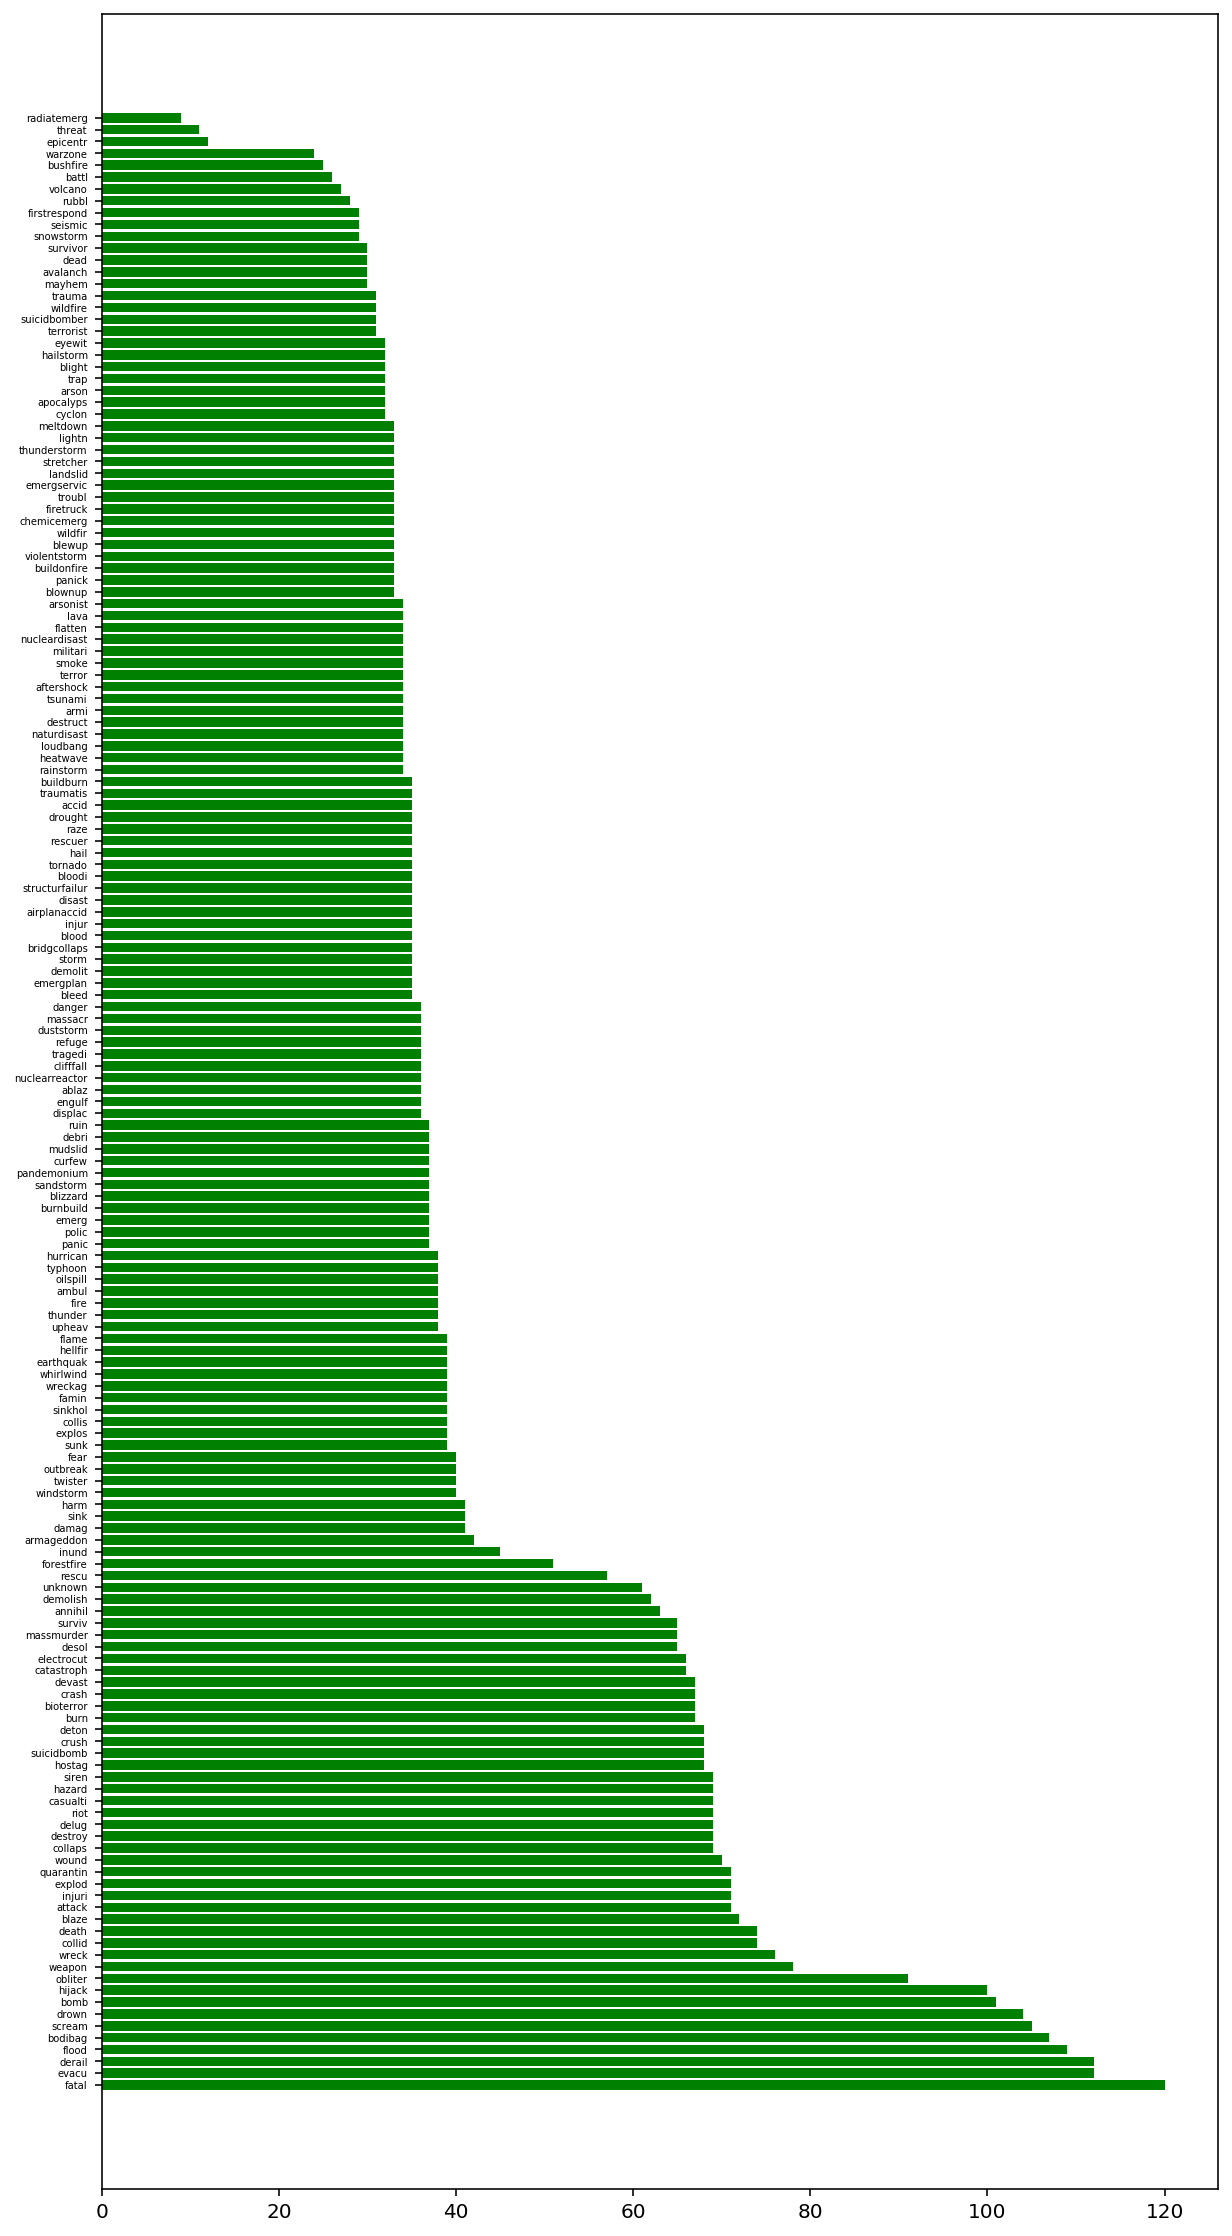

In [1355]:

plt.figure(figsize=(10,20))
plt.barh(idx_val, key_counts, color='green')
plt.yticks(range(len(idx_val)),fontsize = 5)

In [1356]:
train_t.groupby(['keyword','target']).agg('count')['id']

keyword     target
ablaz       0         23
            1         13
accid       0         11
            1         24
aftershock  0         34
                      ..
wound       0         34
            1         36
wreck       0         66
            1         10
wreckag     1         39
Name: id, Length: 331, dtype: int64

In [1357]:

train_t[train_t.target ==1].keyword.value_counts().to_frame()

,keyword
evacu,85
derail,82
flood,66
suicidbomb,64
fatal,62
...,...
panick,2
threat,2
traumatis,2
ruin,1


In [1358]:

train_t[train_t.target ==0].keyword.value_counts().to_frame()

,keyword
bodibag,100
scream,94
obliter,79
drown,77
blaze,66
...,...
nucleardisast,3
suicidbomber,1
outbreak,1
oilspill,1


In [0]:
key_target_counts = train_t[train_t.target ==1].keyword.value_counts().to_frame().join(train_t[train_t.target ==0].keyword.value_counts().to_frame(), lsuffix='_1', rsuffix='_0',how = 'outer')

In [0]:
key_target_counts.columns = ['target_1','target_0']

In [0]:
key_target_counts = key_target_counts.fillna(0)

In [1362]:
key_target_counts

,target_1,target_0
ablaz,13.0,23.0
accid,24.0,11.0
aftershock,0.0,34.0
airplanaccid,30.0,5.0
ambul,20.0,18.0
...,...,...
wildfire,27.0,4.0
windstorm,16.0,24.0
wound,36.0,34.0
wreck,10.0,66.0


In [0]:
key_target_counts.sort_values(by=['target_1','target_0'],ascending=False,inplace = True)

In [0]:
key_target_counts['target_1_ratio'] = key_target_counts.target_1 / (key_target_counts.target_1 +key_target_counts.target_0)
key_target_counts['target_0_ratio'] = key_target_counts.target_0 / (key_target_counts.target_1 +key_target_counts.target_0)

In [0]:
key_target_counts.sort_values(by=['target_1_ratio','target_0_ratio'],ascending=False,inplace = True)

In [1366]:
key_target_counts #target 1 ratio

,target_1,target_0,target_1_ratio,target_0_ratio
wreckag,39.0,0.0,1.000000,0.000000
debri,37.0,0.0,1.000000,0.000000
outbreak,39.0,1.0,0.975000,0.025000
oilspill,37.0,1.0,0.973684,0.026316
typhoon,37.0,1.0,0.973684,0.026316
...,...,...,...,...
blewup,2.0,31.0,0.060606,0.939394
panick,2.0,31.0,0.060606,0.939394
traumatis,2.0,33.0,0.057143,0.942857
ruin,1.0,36.0,0.027027,0.972973


In [1367]:
key_target_counts.describe()

,target_1,target_0,target_1_ratio,target_0_ratio
count,167.000000,167.000000,167.000000,167.000000
mean,19.586826,26.000000,0.434712,0.565288
std,15.162670,17.767237,0.266842,0.266842
min,0.000000,0.000000,0.000000,0.000000
25%,8.000000,12.500000,0.192928,0.333333
50%,17.000000,24.000000,0.405797,0.594203
75%,27.000000,33.500000,0.666667,0.807072
max,85.000000,100.000000,1.000000,1.000000


In [1368]:
train_t[train_t.keyword == 'unknown'] #for the unknown keyword twitter, check if text contain keyword in keyword list

,id,keyword,location,text,target
0,1,unknown,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,unknown,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,unknown,unknown,All residents asked to 'shelter in place' are ...,1
3,6,unknown,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,unknown,unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,unknown,unknown,Two giant cranes holding a bridge collapse int...,1
7609,10870,unknown,unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,unknown,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,unknown,unknown,Police investigating after an e-bike collided ...,1


In [0]:
k_1 = key_target_counts[key_target_counts['target_1_ratio']>=0.2].index.values #keywords
k_1_r = key_target_counts[key_target_counts['target_1_ratio']>=0.2]['target_1_ratio'].values #ratio
k_0 = key_target_counts[key_target_counts['target_0_ratio']>=0.2].index.values #keywords
k_0_r = key_target_counts[key_target_counts['target_0_ratio']>=0.2]['target_0_ratio'].values #ratio

([<matplotlib.axis.YTick at 0x7f319c377470>,
 <a list of 123 Text yticklabel objects>)

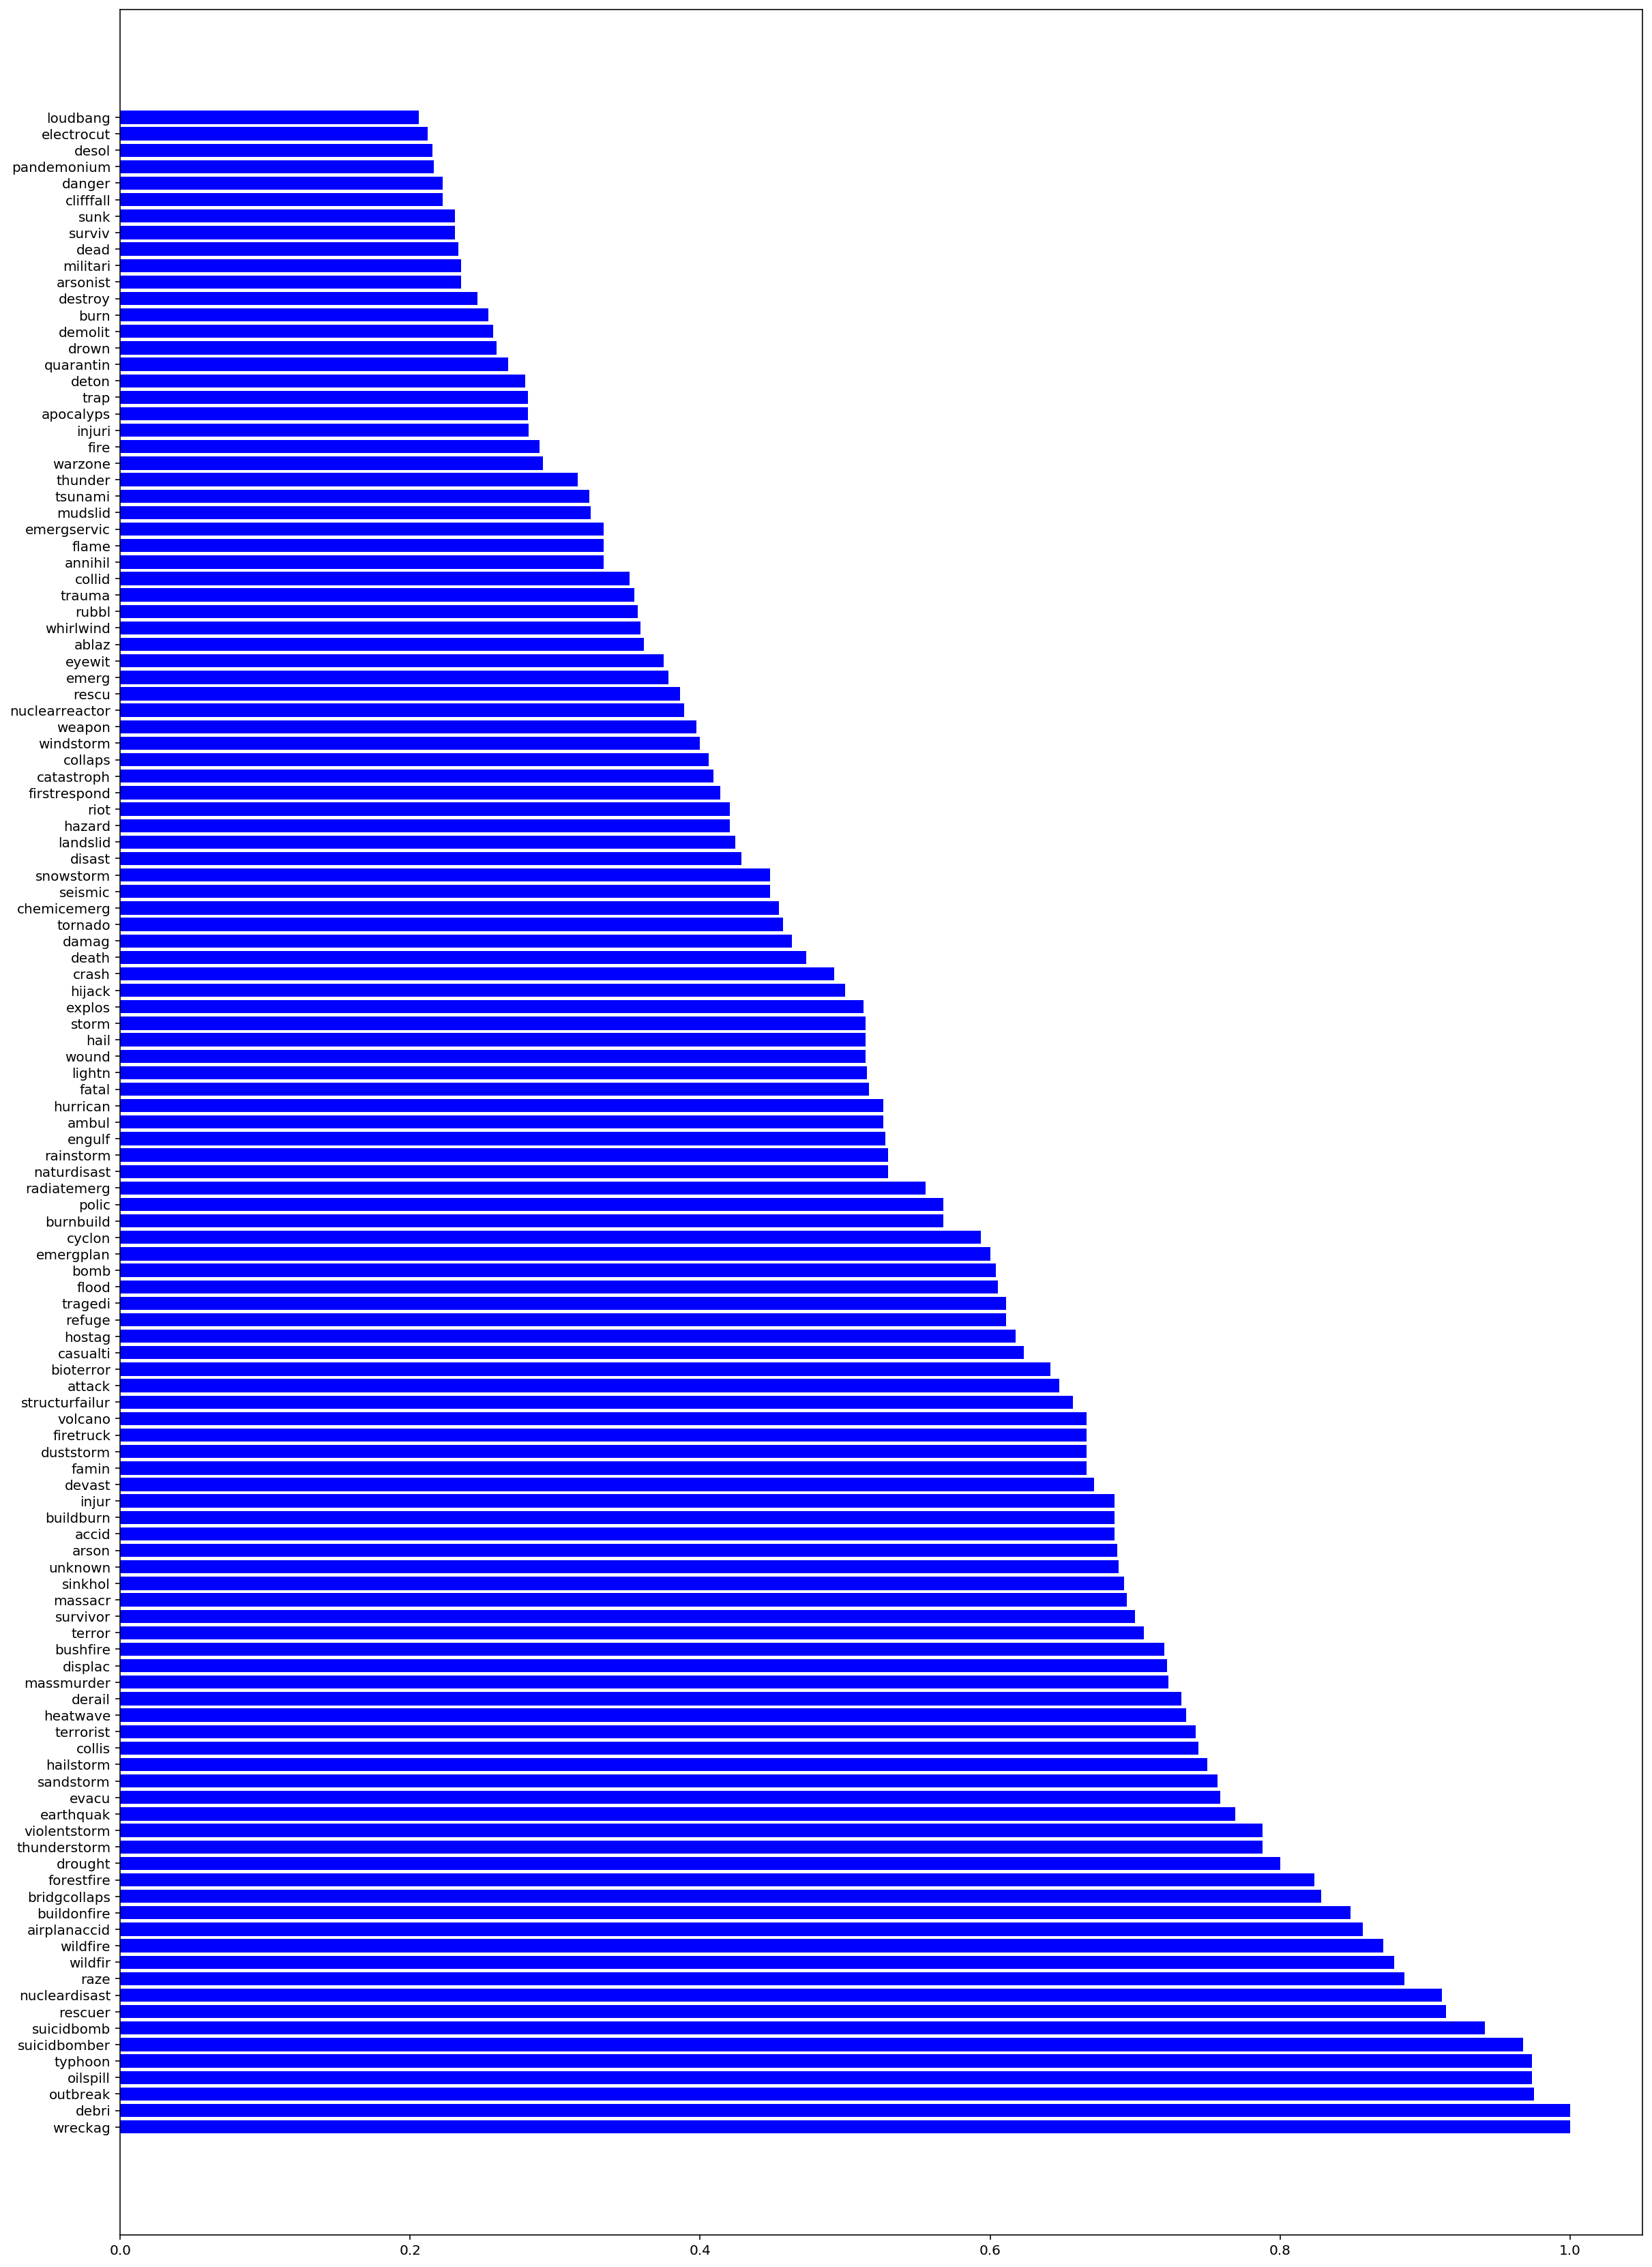

In [1370]:
plt.figure(figsize=(20,30))
plt.barh(k_1, k_1_r, color='blue')
plt.yticks(range(len(k_1)),fontsize = 10)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150],
 <a list of 151 Text yticklabel objects>)

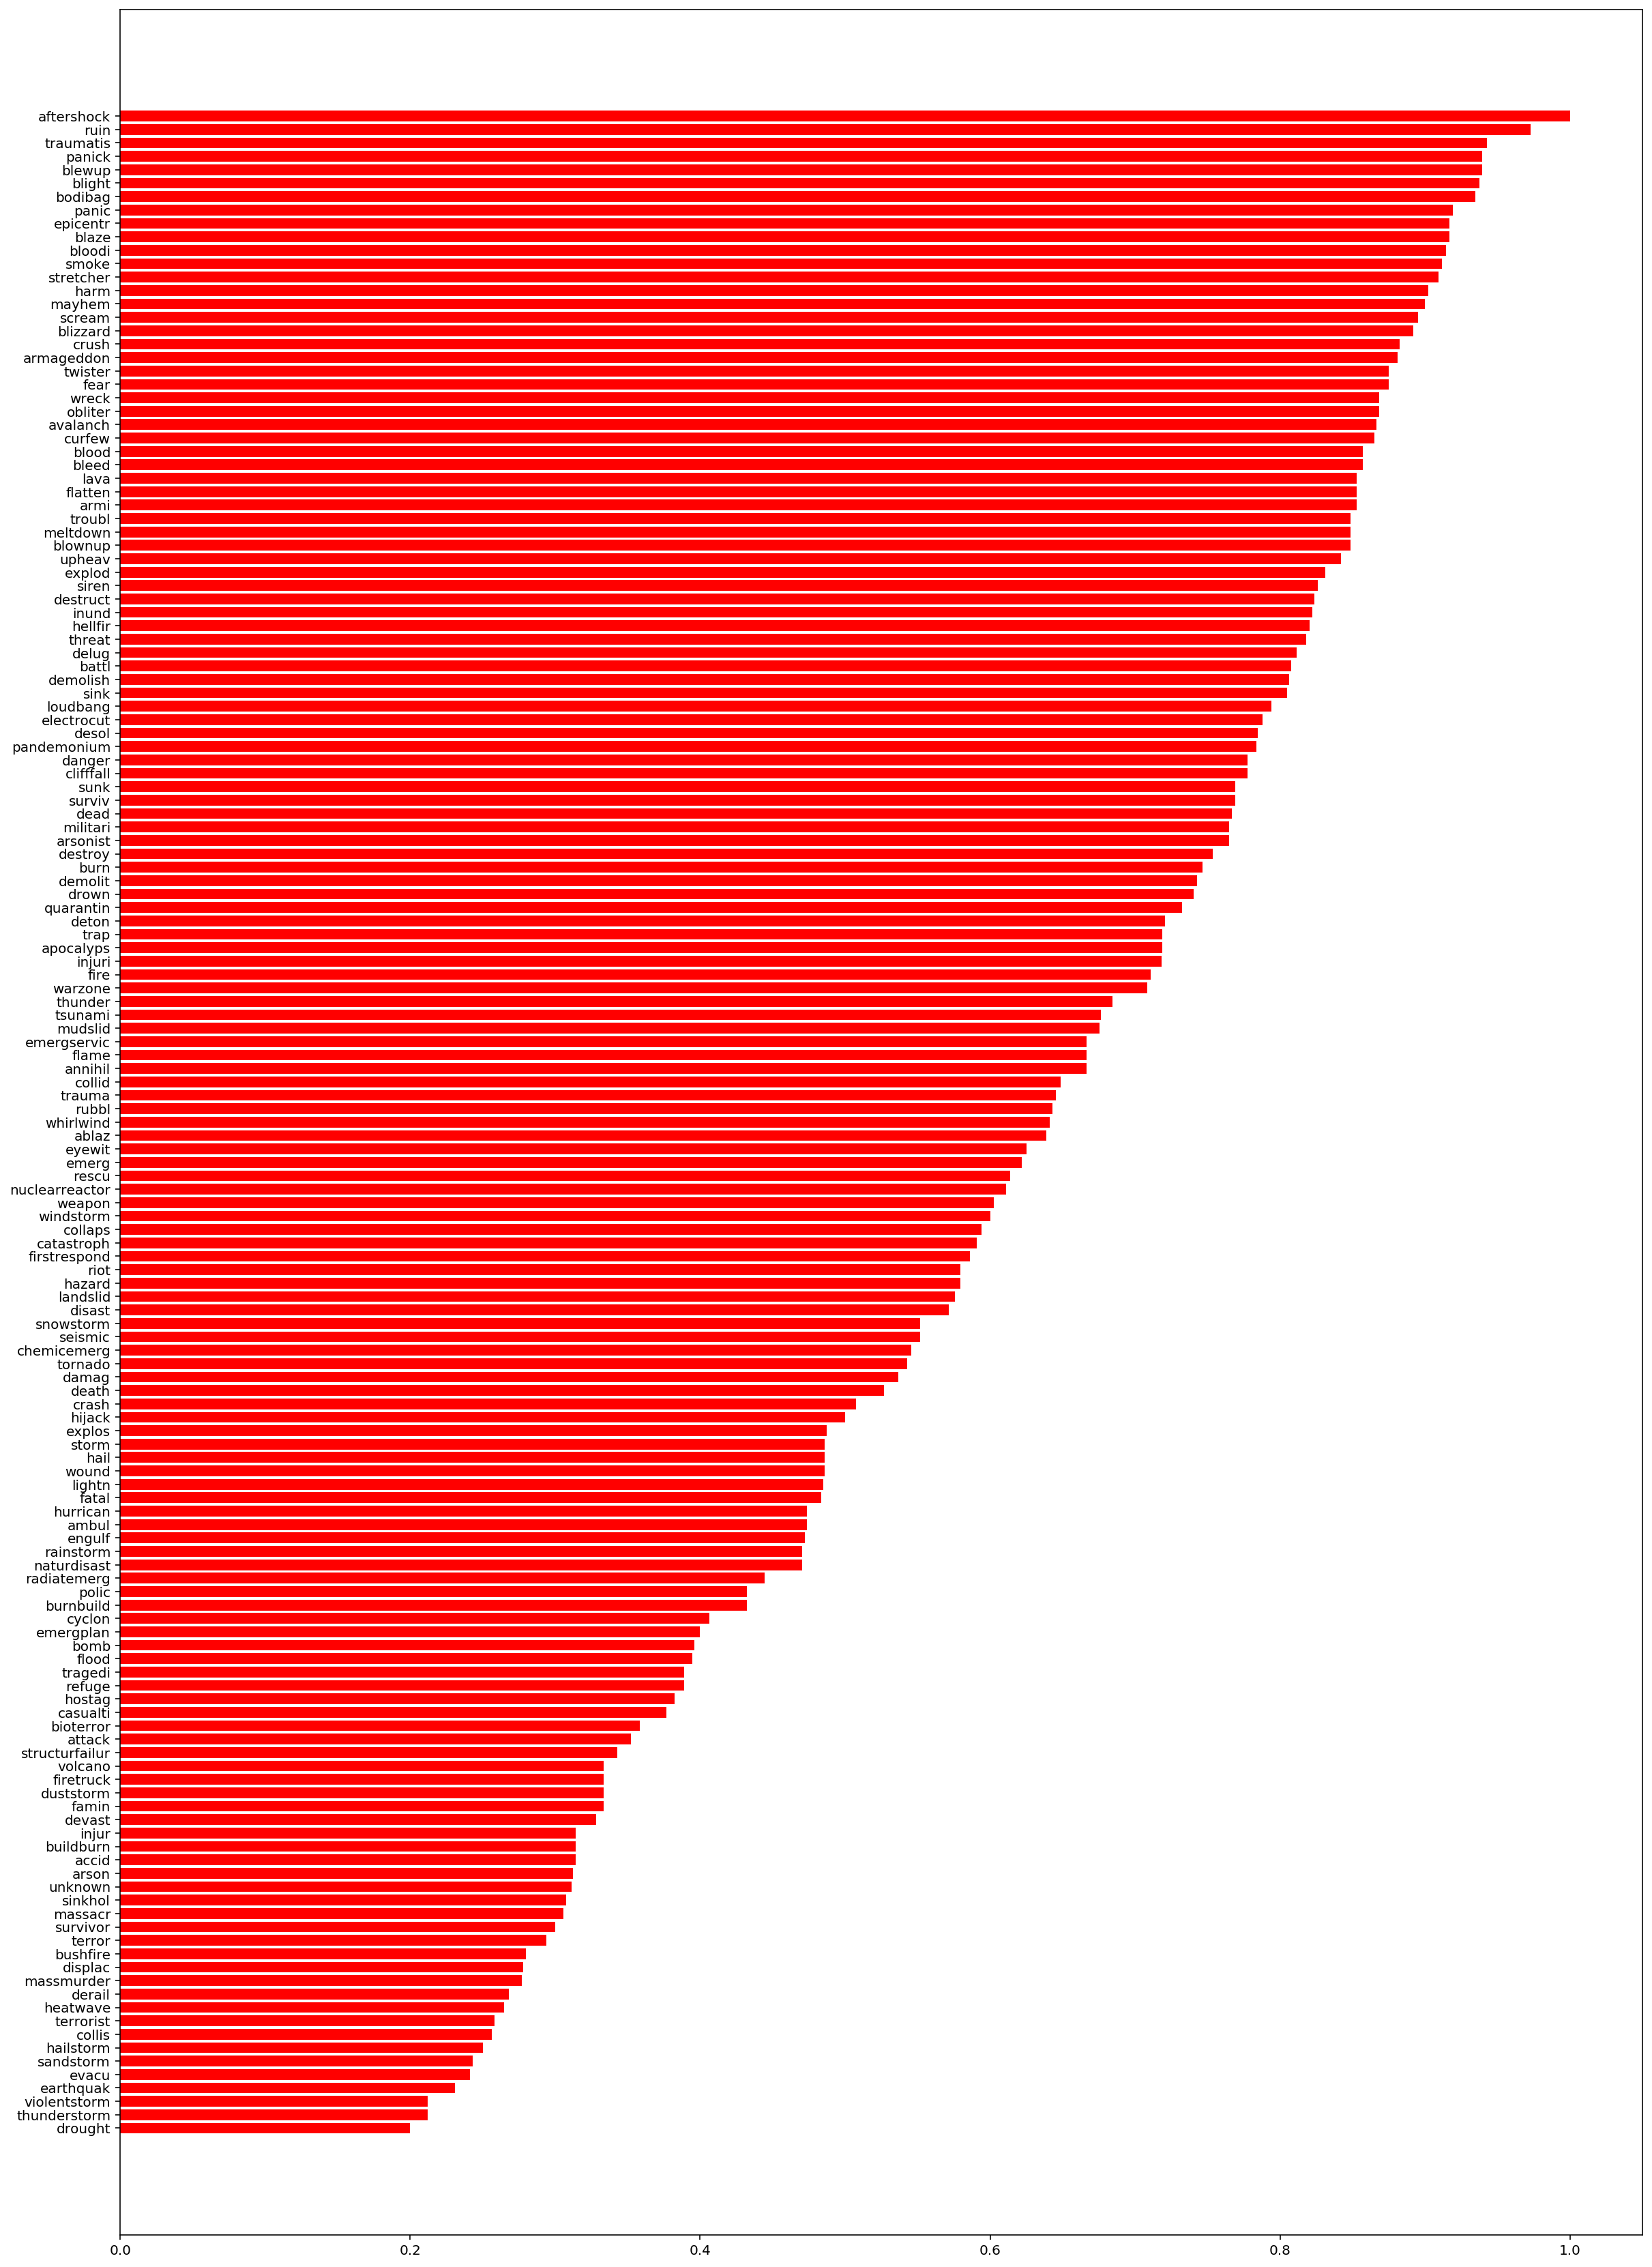

In [1371]:

plt.figure(figsize=(20,30))
plt.barh(k_0, k_0_r, color='red')
plt.yticks(fontsize = 10)

In [1372]:

list(train_t.location.unique())

['unknown',
 'Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja',
 'USA',
 'South Africa',
 'Sao Paulo, Brazil',
 'hollywoodland ',
 'Edmonton, Alberta - Treaty 6',
 'Inang Pamantasan',
 'Twitter Lockout in progress',
 'Concord, CA',
 'Calgary, AB',
 'San Francisco',
 'CLVLND',
 'Nashville, TN',
 'Santa Clara, CA',
 'UK',
 'St. Louis, MO',
 'Walker County, Alabama',
 'Australia',
 'North Carolina',
 'Norf Carolina',
 'San Mateo County, CA',
 'Njoro, Kenya',
 "Your Sister's Bedroom",
 'Arlington, TX',
 'South Bloomfield, OH',
 'New Hanover County, NC',
 'Maldives',
 'Manchester, NH',
 'Wilmington, NC',
 'global',
 'Alberta | Sask. | Montana',
 'Charlotte',
 'Baton Rouge, LA',
 'Hagerstown, MD',
 'Gloucestershire , UK',
 'Nairobi, Kenya',
 'Instagram 

In [0]:
def text_cleaning_hyperlink(text):
    
    #remove hyper link
    return re.sub(r"http\S+","",text) #remove hyperlink

In [0]:
def text_cleaning_punctuation(text):
    
    translator = str.maketrans('', '', string.punctuation) #remove punctuation
    
    return text.translate(translator)

In [0]:
def text_cleaning_stopwords(text):
    
    stop_words = set(stopwords.words('english'))
    
    word_token = word_tokenize(text)
    
    filtered_sentence = [w for w in word_token if not w in stop_words]
    
    return ' '.join(filtered_sentence) #return string of no stopwords

In [0]:
def text_cleaning_lowercase(text):
    
    return text.lower()

In [0]:
def find_synonyms(word):
    
    synonyms = []
    
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            
            synonyms.append(lm.name())
    
    if len(synonyms)>0:
        return set(synonyms) #exist synoyms
    
    else:
        return set([word]) #not exist synoyms
  

#Reference: https://towardsdatascience.com/synonyms-and-antonyms-in-python-a865a5e14ce8

In [1378]:
import nltk
nltk.download('stopwords')
def text_extract(text_lst):
    txt = []
    for i,x in enumerate(text_lst):
        
        for j,p in enumerate(x):
            
            txt.append(p)
    
    return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1379]:
len(train_t.keyword.unique())

167

In [1380]:
import nltk
nltk.download('punkt')
train_t.text = train_t.text.apply(lambda x: text_cleaning_stopwords(text_cleaning_punctuation(text_cleaning_hyperlink(x.lower()))))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1381]:
train_t.head(10)

,id,keyword,location,text,target
0,1,unknown,unknown,deeds reason earthquake may allah forgive us,1
1,4,unknown,unknown,forest fire near la ronge sask canada,1
2,5,unknown,unknown,residents asked shelter place notified officer...,1
3,6,unknown,unknown,13000 people receive wildfires evacuation orde...,1
4,7,unknown,unknown,got sent photo ruby alaska smoke wildfires pou...,1
5,8,unknown,unknown,rockyfire update california hwy 20 closed dire...,1
6,10,unknown,unknown,flood disaster heavy rain causes flash floodin...,1
7,13,unknown,unknown,im top hill see fire woods,1
8,14,unknown,unknown,theres emergency evacuation happening building...,1
9,15,unknown,unknown,im afraid tornado coming area,1


### Training Model #1

### Logistic Regression

### Reference: https://www.kaggle.com/ashishpatel26/beginner-to-intermediate-nlp-tutorial

In [0]:

#We need to remove punctuations, lowercase, remove stop words, and stem words. All these steps can be directly performed by CountVectorizer if we pass the right parameter values. We can do this as follows.

#We first create a stemmer, using the Porter Stemmer implementation.

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = [stemmer.stem(item) for item in tokens]
    return(stemmed)

In [0]:
# tokenizer, which removes non-letters and stems:

def tokenize(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return(stems)

In [0]:
#Here we init the vectoriser with the CountVectorizer class, making sure to pass our tokenizer and stemmers as parameters, remove stop words, and lowercase all characters

vectorizer = CountVectorizer(
analyzer = 'word',
tokenizer = tokenize,
lowercase = True,
stop_words = 'english',
max_features = 85
)

In [1385]:
features = vectorizer.fit_transform(train_t.text.tolist())

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [1386]:
features_nd = features.toarray()
features_nd

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

###Logistic Regression

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(features_nd[0:len(train_t)], train_t.target,train_size=0.85, random_state=1234)

In [0]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [0]:
log_model = log_model.fit(X=X_train, y=y_train)

In [0]:
y_pred = log_model.predict(X_test)

In [1391]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

###Accuracy

In [1392]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       627
           1       0.75      0.53      0.62       515

    accuracy                           0.71      1142
   macro avg       0.72      0.69      0.69      1142
weighted avg       0.71      0.71      0.70      1142



### Training Model #2

### Reference: https://www.kaggle.com/ashishpatel26/beginner-to-intermediate-nlp-tutorial

###We are going to train Naive Bayes Classifier. 
###Naive Bayes Classifier is a good choice given we have a medium sized dataset, 
###NB classifier scales well and also NB classifier has been historically used in NLP tasks. 
###We will train Multinomial and Bernoulli NB classifier, 
###since they almost always outperfrom Gaussian NB classifier in NLP tasks



In [1393]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(train_t['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(train_t['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17673,17674,17675,17676,17677,17678,17679,17680,17681,17682,17683,17684,17685,17686,17687,17688,17689,17690,17691,17692,17693,17694,17695,17696,17697,17698,17699,17700,17701,17702,17703,17704,17705,17706,17707,17708,17709,17710,17711,17712
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1394]:
df['target'] = train_t['target']
df['id'] = train_t['id']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17675,17676,17677,17678,17679,17680,17681,17682,17683,17684,17685,17686,17687,17688,17689,17690,17691,17692,17693,17694,17695,17696,17697,17698,17699,17700,17701,17702,17703,17704,17705,17706,17707,17708,17709,17710,17711,17712,target,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,8
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,14
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,15


In [0]:
#Features and target of the models

features = df.columns.tolist()
target = 'target'
# removing the target and the id from features
features.remove(target)
features.remove('id')

In [1396]:
#Tuning Multinomial Naive Bayes Classifier
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [0]:
# Gridsearch
# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

###Training Model

In [1398]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[target])

GridSearchCV(cv=4, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

###Collect results in pandas dataframe

In [0]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

###Plot of logloss vs alpha

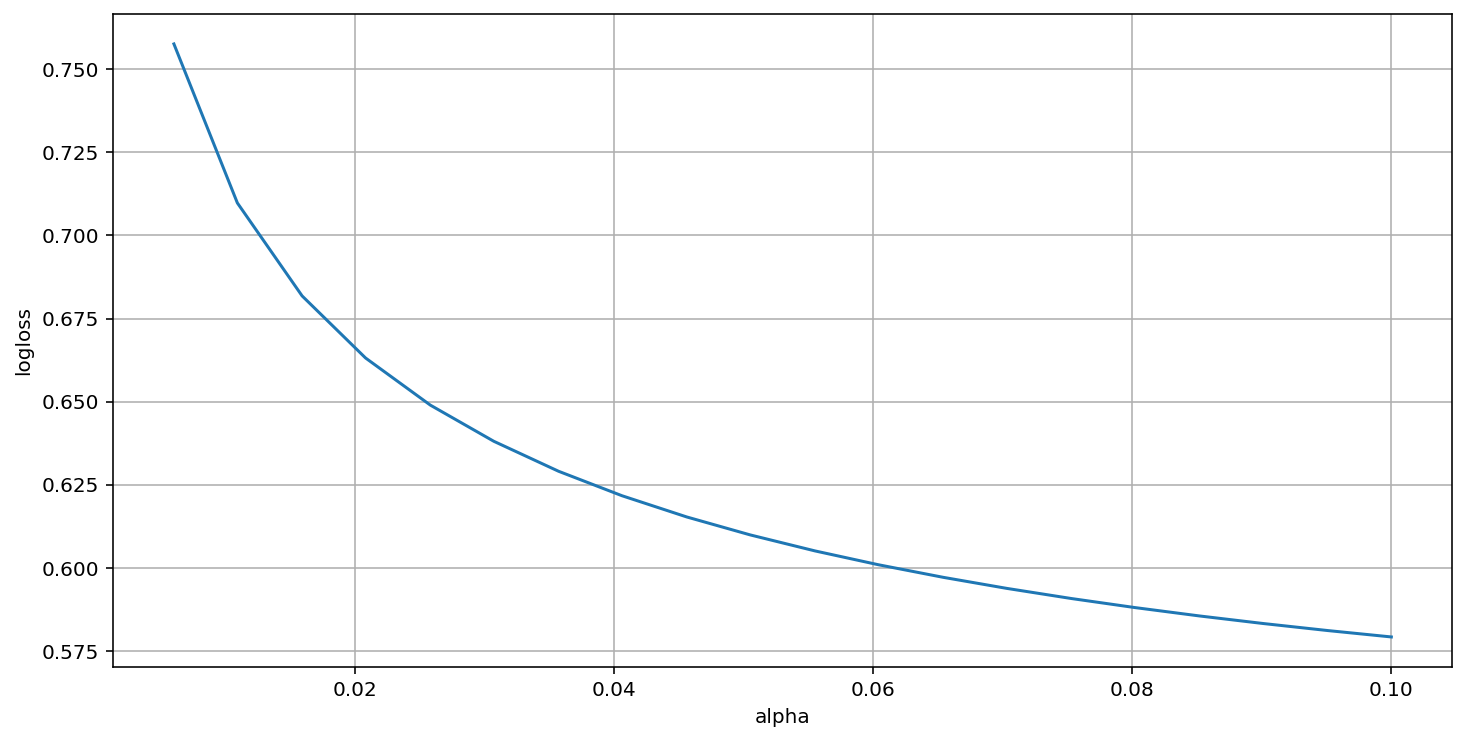

In [1400]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [1401]:
print("Best parameter: ",gridsearch1.best_params_)

Best parameter:  {'alpha': 0.1}


In [1402]:
print("Best score: ",gridsearch1.best_score_) 

Best score:  -0.5792815309526613


###Tuning with Naive Bayes Classifier: BernoulliNB

In [1403]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [0]:
#Parameter grid
parameter_grid = [{"alpha":alpha_list2}]

In [1405]:
# Training Model
# classifier object
classifier2 = BernoulliNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch2 = GridSearchCV(classifier2,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch2.fit(df[features], df[target])

GridSearchCV(cv=4, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [0]:
#Collect results in pandas dataframe

results2 = pd.DataFrame()
# collect alpha list
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data
# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

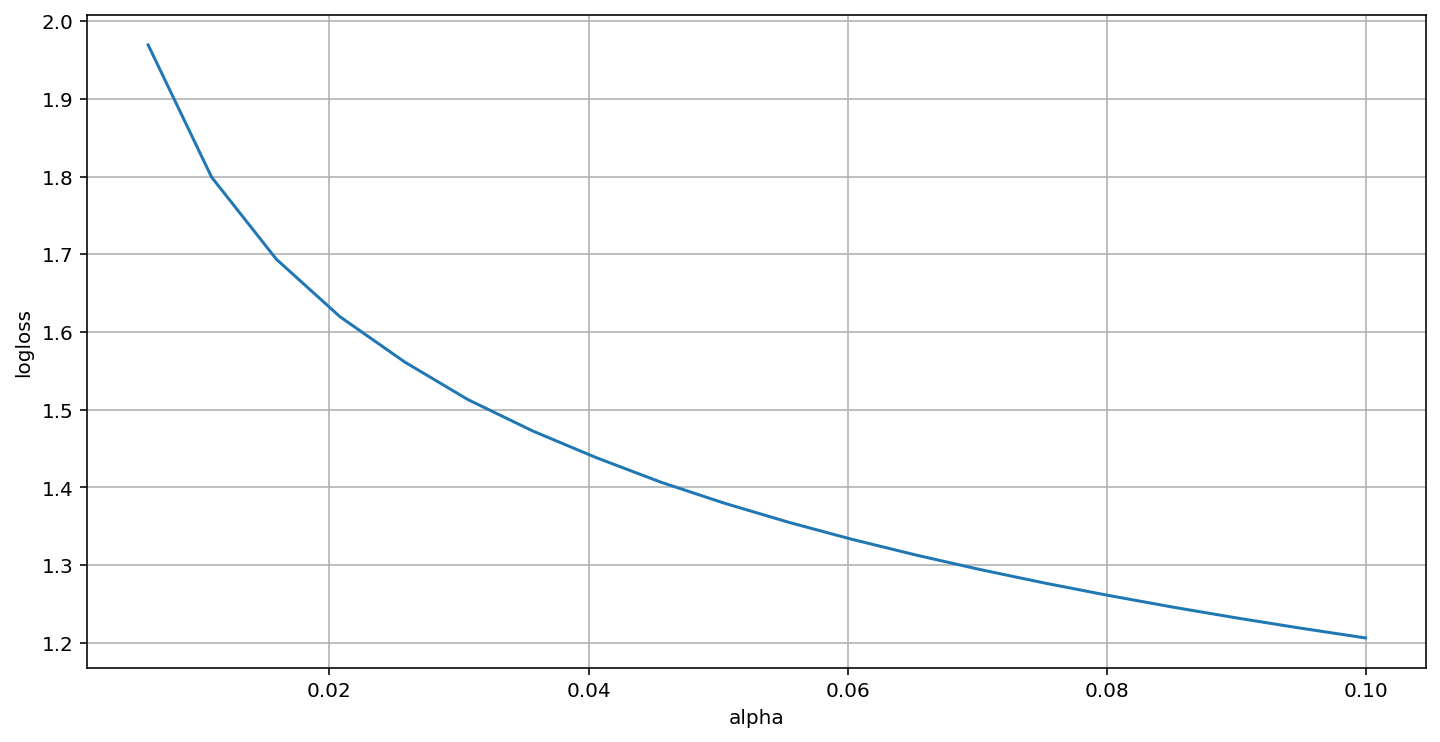

In [1407]:
#Plot of logloss vs alpha

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()


In [1408]:
print("Best parameter: ",gridsearch2.best_params_)

Best parameter:  {'alpha': 0.1}


In [1409]:
print("Best score: ",gridsearch2.best_score_)

Best score:  -1.2061139209905372
